In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from keras.preprocessing import sequence
from tensorflow.keras import activations
from keras.models import Sequential
from keras.layers import Dense
import itertools 
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import tensorflow.keras as K

from tensorflow.keras import layers
from tensorflow import keras
from keras.models import *
import tensorflow as tf
from tensorflow.keras import Model
import gc
from tensorflow.keras import backend as k
from tensorflow.keras.callbacks import Callback
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


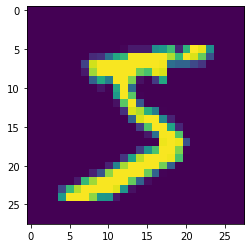

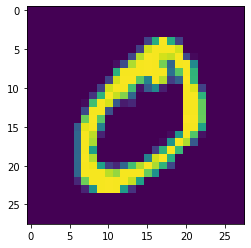

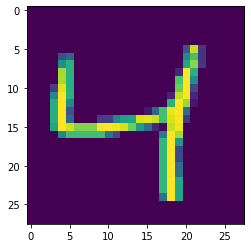

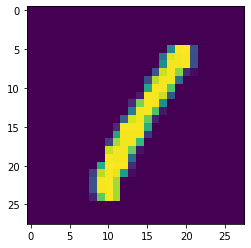

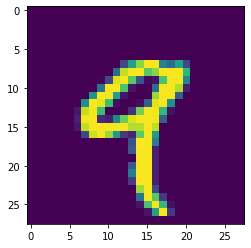

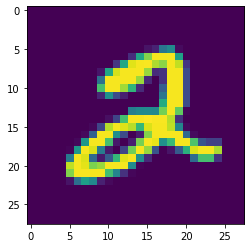

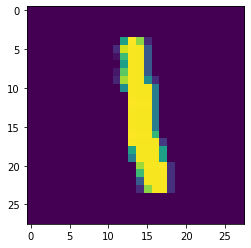

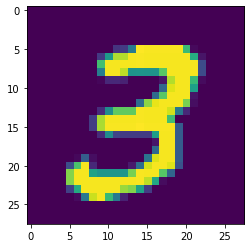

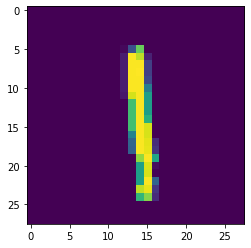

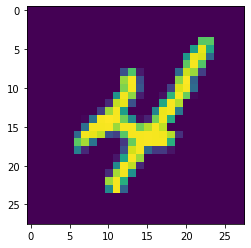

In [9]:
for i in range(10):
  plt.figure()
  plt.imshow(X_train[i])

In [2]:


model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=0.001)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer, metrics=["accuracy"])
model.fit(X_train, y_train, epochs=50)
model.evaluate(X_test, y_test)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 10s 3ms/step - loss: 3.6715 - accuracy: 0.7667
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5117 - accuracy: 0.8602
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3928 - accuracy: 0.8914
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3632 - accuracy: 0.9023
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3440 - accuracy: 0.9074
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3237 - accuracy: 0.9146
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3217 - accuracy: 0.9158
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2903 - accuracy: 0.9240
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2870 - accuracy: 0.9262
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2901 - accura

[0.17565391957759857, 0.9688000082969666]

In [3]:
def predict_proba(X, model, num_samples):
    preds = [model(X, training=True) for _ in range(num_samples)]
    return np.stack(preds).mean(axis=0)
     
def predict_class(X, model, num_samples):
    proba_preds = predict_proba(X, model, num_samples)
    return np.argmax(proba_preds, axis=1)

In [10]:
y_pred = predict_class(X_test, model, 100)
m_acc = np.mean(y_pred == y_test)

loss, acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1757 - accuracy: 0.9688


In [11]:
print("Monte Carlo Accuracy", m_acc, "Normal Model Accuracy", acc)

Monte Carlo Accuracy 0.9738 Normal Model Accuracy 0.9688000082969666


In [12]:
#Calculating Uncertainty
y_pred_proba = predict_proba(X_test, model, 100)

softmax_output = np.round(model.predict(X_test[1:2]), 3)
mc_pred_proba = np.round(y_pred_proba[1], 3)
print(softmax_output, mc_pred_proba)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] [0.004 0.001 0.97  0.009 0.001 0.003 0.002 0.002 0.004 0.003]


In [13]:
#Monte Carlo for Regression 

(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)


65536/57026 [==================================] - 0s 0us/step
(404, 13) (404,)
(102, 13) (102,)


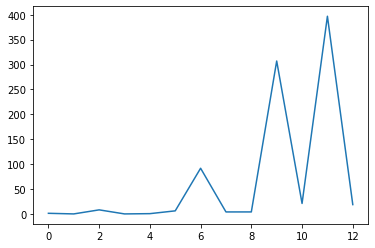

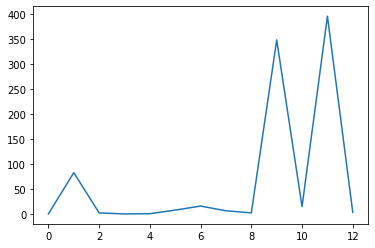

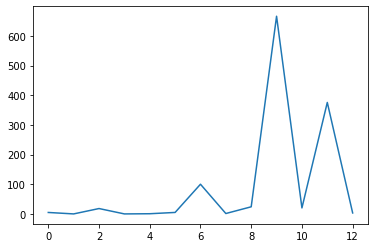

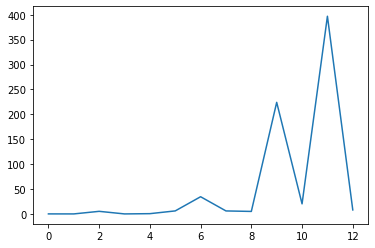

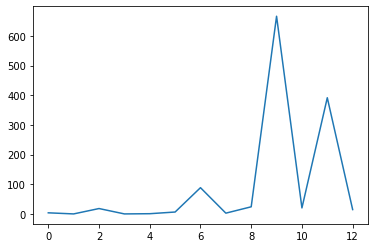

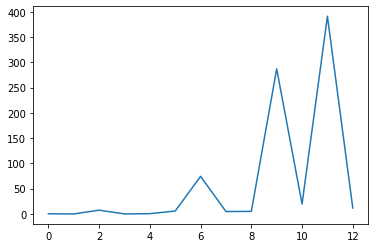

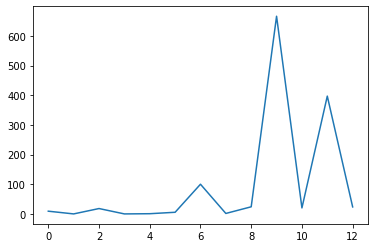

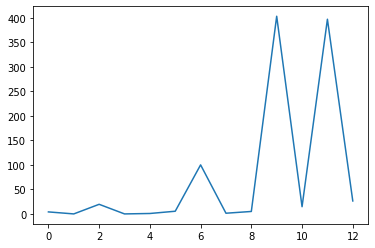

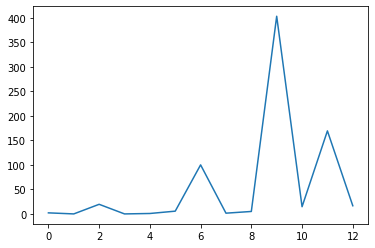

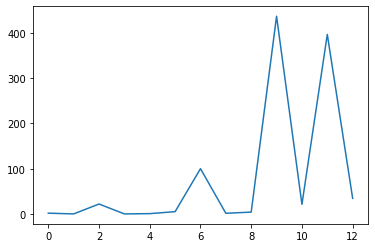

In [19]:
for i in range(10):
  plt.figure()
  plt.plot(X_train[i])

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation="relu"))

optimizer = keras.optimizers.Nadam(lr=0.001)
model.compile(loss="mse", optimizer=optimizer)
model.fit(X_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


12/12 [==============================] - 1s 14ms/step - loss: 595.2405 - val_loss: 505.7690
Epoch 2/30
12/12 [==============================] - 0s 5ms/step - loss: 595.9196 - val_loss: 505.7690
Epoch 3/30
12/12 [==============================] - 0s 5ms/step - loss: 592.6550 - val_loss: 505.7690
Epoch 4/30
12/12 [==============================] - 0s 5ms/step - loss: 586.2090 - val_loss: 505.7690
Epoch 5/30
12/12 [==============================] - 0s 5ms/step - loss: 576.4082 - val_loss: 236.0354
Epoch 6/30
12/12 [==============================] - 0s 5ms/step - loss: 370.3445 - val_loss: 100.2780
Epoch 7/30
12/12 [==============================] - 0s 5ms/step - loss: 319.2839 - val_loss: 230.2218
Epoch 8/30
12/12 [==============================] - 0s 5ms/step - loss: 300.9409 - val_loss: 117.8338
Epoch 9/30
12/12 [==============================] - 0s 5ms/step - loss: 246.3912 - val_loss: 92.6384
Epoch 10/30
12/12 [==============================] - 0s 5ms/step - loss: 236.7919 - val_loss:

In [21]:
def predict_dist(X, model, num_samples):
    preds = [model(X, training=True) for _ in range(num_samples)]
    return np.hstack(preds)

def predict_point(X, model, num_samples):
    pred_dist = predict_dist(X, model, num_samples)
    return pred_dist.mean(axis=1)

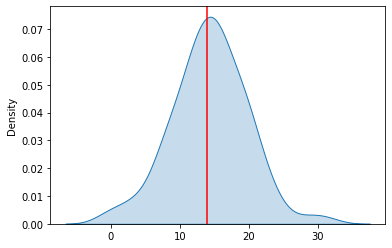

In [23]:
import seaborn as sns
y_pred_dist = predict_dist(X_test, model, 100)
y_pred = predict_point(X_test, model, 100)

sns.kdeplot(y_pred_dist[0], shade=True)
plt.axvline(y_pred[0], color='red')
plt.show()